## SVM

SVM (support vector machine 支援向量機)，是在特徵空間中找到一個分離超平面，也就是「決策邊界」(decision boundary)。

我們可以透過這個決策邊界將資料分成不同類別，最佳化的目標是「邊界」(margin)。

離灰線最近的是支援向量(support vector)。

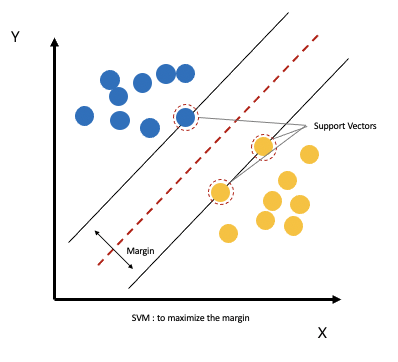

當然不是每個情況都可以靠這種一刀兩斷的方式進行分類，SVM 可以將資料投影到高維度空間，在高維度空間找到超平面進行分割。

通常使用的 kernal 核心轉換有 RBF Kernal 高斯轉換、高次方轉換等等

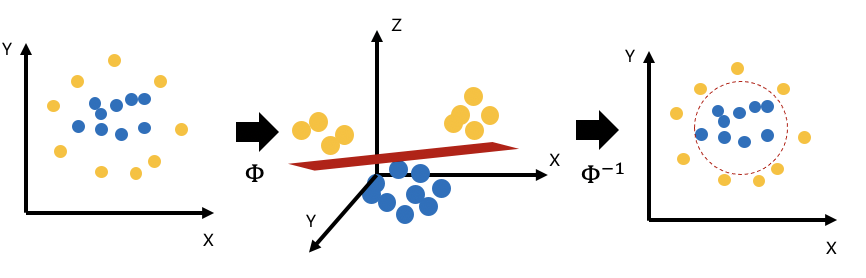

### SVM 操作示範

#### 選兩個變數來繪製且沒有PCA

In [49]:
dataset = pd.read_csv('Book_Purchased.csv')
dataset

,ID,Gender,Age,Salary,VIP,Purchased
0,BOOK62498940,Male,22,20900.0,0,0
1,BOOK63243776,Male,43,22000.0,0,0
2,BOOK62674300,Female,29,47300.0,0,0
3,BOOK62412984,Female,30,62700.0,0,0
4,BOOK63216008,Male,22,83600.0,0,0
...,...,...,...,...,...,...
395,BOOK62767452,Female,49,45100.0,1,1
396,BOOK62824284,Male,54,25300.0,1,1
397,BOOK62617184,Female,53,22000.0,0,1
398,BOOK63020072,Male,23,36300.0,0,0


In [50]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 5].values

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
#Fitting classifier to the Training set
from sklearn.svm import SVC
#input kernel
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [54]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [56]:
print (cm)

[[58  9]
 [ 5 28]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        67
           1       0.76      0.85      0.80        33

    accuracy                           0.86       100
   macro avg       0.84      0.86      0.85       100
weighted avg       0.87      0.86      0.86       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


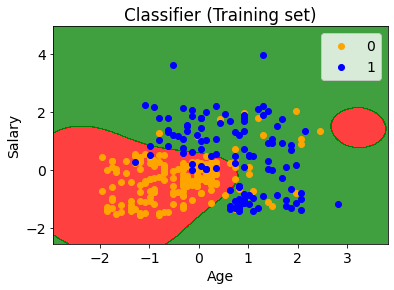

In [58]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


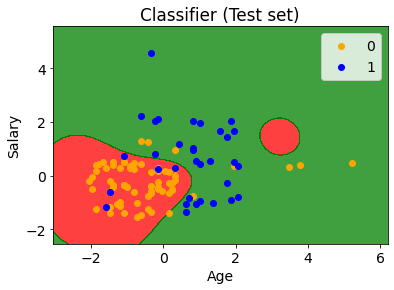

In [59]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

#### PCA

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

In [61]:
X = dataset.iloc[:, [2, 3, 4]].values
y = dataset.iloc[:, 5].values
dx = PCA(n_components=2).fit_transform(X)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, y, test_size=0.2, random_state=0)

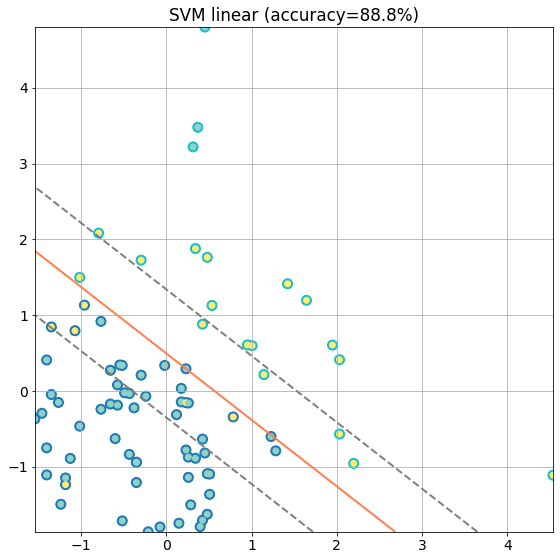

In [67]:
# 訓練線性 SVM 並預測結果
kernel = 'linear'
model = SVC(kernel=kernel)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'SVM {kernel} (accuracy={test_score:.1f}%)')
plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)
# 求出超平面與邊界
x_min = np.amin(dx_test.T[0])
x_max = np.amax(dx_test.T[0])
y_min = np.amin(dx_test.T[1])
y_max = np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.decision_function(
    np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# 畫出超平面與邊界
plt.contour(XX, YY, Z, colors=['grey', 'coral', 'grey'],
            linestyles=['--', '-', '--'], linewidths=[2, 2, 2],
            levels=[-1, 0, 1])
plt.grid(True)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.tight_layout()
plt.show()

##### 非線性 SVM(RBF)

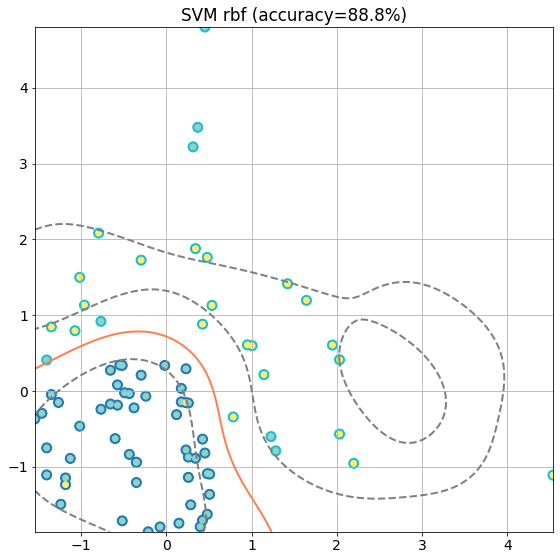

In [68]:
# 訓練非線性 SVM 並預測結果
kernel = 'rbf'
model = SVC(kernel=kernel)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'SVM {kernel} (accuracy={test_score:.1f}%)')
plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)
# 求出超平面與邊界
x_min = np.amin(dx_test.T[0])
x_max = np.amax(dx_test.T[0])
y_min = np.amin(dx_test.T[1])
y_max = np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.decision_function(
    np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# 畫出超平面與邊界
plt.contour(XX, YY, Z, colors=['grey', 'coral', 'grey'],
            linestyles=['--', '-', '--'], linewidths=[2, 2, 2],
            levels=[-1, 0, 1])
plt.grid(True)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.tight_layout()
plt.show()

##### 非線性 SVM(POLY)

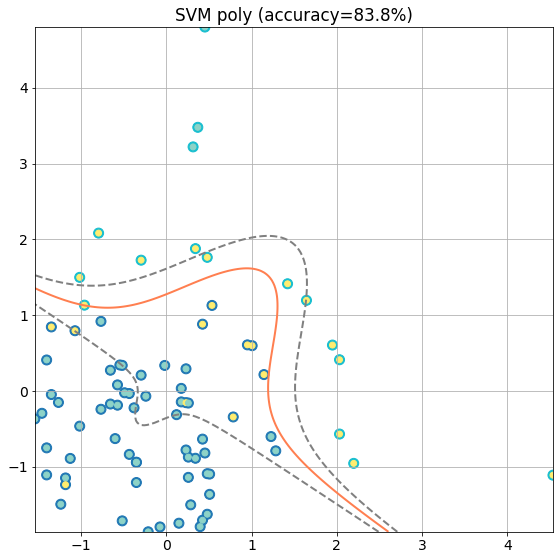

In [69]:
# 訓練非線性 SVM 並預測結果
kernel = 'poly'
model = SVC(kernel=kernel)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'SVM {kernel} (accuracy={test_score:.1f}%)')
plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)
# 求出超平面與邊界
x_min = np.amin(dx_test.T[0])
x_max = np.amax(dx_test.T[0])
y_min = np.amin(dx_test.T[1])
y_max = np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.decision_function(
    np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# 畫出超平面與邊界
plt.contour(XX, YY, Z, colors=['grey', 'coral', 'grey'],
            linestyles=['--', '-', '--'], linewidths=[2, 2, 2],
            levels=[-1, 0, 1])
plt.grid(True)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.tight_layout()
plt.show()

##### 非線性 SVM(Sigmoid)

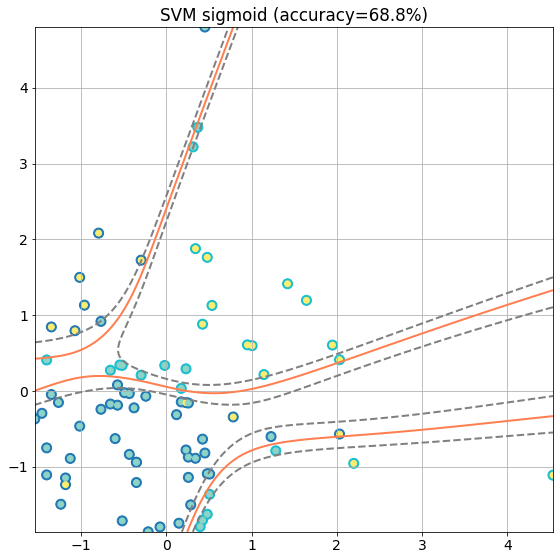

In [70]:
# 訓練非線性 SVM 並預測結果
kernel = 'sigmoid'  # 選擇 kernel: 'linear', 'poly', 'rbf', 'sigmoid'
model = SVC(kernel=kernel)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'SVM {kernel} (accuracy={test_score:.1f}%)')
plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)
# 求出超平面與邊界
x_min = np.amin(dx_test.T[0])
x_max = np.amax(dx_test.T[0])
y_min = np.amin(dx_test.T[1])
y_max = np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.decision_function(
    np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# 畫出超平面與邊界
plt.contour(XX, YY, Z, colors=['grey', 'coral', 'grey'],
            linestyles=['--', '-', '--'], linewidths=[2, 2, 2],
            levels=[-1, 0, 1])
plt.grid(True)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.tight_layout()
plt.show()